In [1]:
#Annealed Importance Sampling
#Author Aji Palar


import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

def f_0(x, mu, sigma):
    """
    Target distribution: \propto N(-5, 2)
    """
    return np.exp(-(x+mu)**2/2/sigma)

def f2(x):
    return f_0(x, 7, 3)

f_0 = lambda x: f2(x)

def f_n(x):
    """
    Define proposal distribtuion
    """
    return np.exp(-(x)**2)

def f_j(x, beta):
    """
    Intermediate distribution: interpolation between f_0, and f_n
    """
    return f_0(x)**beta * f_n(x)**(1-beta)

# Proposal distribution: 1/Z * f_n
p_n = st.norm(0, 1)

def T(x, f, n_steps=10):
    """
    Transition distribution: T(x'|x) using n-steps Metropolis sampler
    """
    for t in range(n_steps):
        #Proposal
        x_prime = x + np.random.randn()
        
        #Acceptance prob
        a = f(x_prime) / f(x)
        
        if np.random.rand() < a:
            x = x_prime
    return x

x = np.arange(-10, 5, 0.1)
n_inter = 50
betas = np.linspace(0, 1, n_inter)
n_samples = 1000
samples = np.zeros(n_samples)
weights = np.zeros(n_samples)

for t in range(n_samples):
    # Sample initial point from q(x)
    x = p_n.rvs()
    w = 1
    for n in range(1, len(betas)):
        # Transition
        x = T(x, lambda x: f_j(x, betas[n]), n_steps=5)
        
        # Compute the weight in log space (log-sum):
        
        #w *= f_{n-1}(x_{n-1}) / f_n(x_{n-1})
        w += np.log(f_j(x, betas[n])) - np.log(f_j(x, betas[n-1]))
    samples[t] = x
    weights[t] = np.exp(w)

plt.hist(samples, bins=20)
plt.show()

np.median(samples)

#Compute expectation
def EAIS(weights, samples):
    """
    Gives the mean value from annealed importance sampling
    """
    return 1/np.sum(weights) * np.sum(weights * samples)

def stdAIS(weights, samples):
    """
    Gives the standard deviation from annealed importance samples
    """
    a = EAIS(weights, samples)
    return 1/np.sum(weights) * np.sum(weights * ((samples - a))**2)

TypeError: <lambda>() takes 1 positional argument but 3 were given

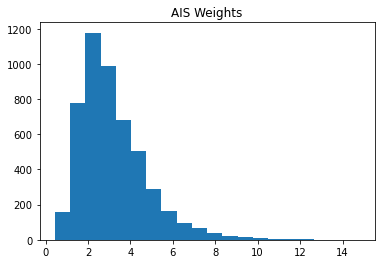

In [12]:
plt.hist(weights, bins=20)
plt.title("AIS Weights")
plt.show()

In [13]:
EAIS(weights, samples), stdAIS(weights, samples)

(-2.031147306370815, 0.48752943607299193)